### IMDB Dataset Example

#### Data Information
List of codified Reviews and labels if the review was a positive review or negative review

#### Goal of Model
Predict if a review is positive or negative 

#### Process
Use multilayer Dense network to predict 0 or 1 (Negative or Positive)

In [1]:
"""Library and Data Imports"""
import tensorflow as tf
CUDA_VISIBLE_DEVICES=""
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


2022-08-24 10:24:29.802405: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-24 10:24:29.802434: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
"""Decoding Back to English"""
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)

decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)
# print(decoded_review)

In [3]:
"""One hot encode the reviews"""

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Split into Test/Train

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

    
    

In [4]:
"""Building the network"""
# Not reading the details on the model at the moment
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy',metrics=['accuracy'])
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val,y_val))

2022-08-24 10:24:36.478456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 10:24:36.482029: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-24 10:24:36.482081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-24 10:24:36.482124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-24 10:24:36.482167: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

Epoch 1/4
30/30 [==============================] - 1s 23ms/step - loss: 0.4926 - accuracy: 0.7941 - val_loss: 0.3732 - val_accuracy: 0.8644
Epoch 2/4
30/30 [==============================] - 0s 9ms/step - loss: 0.2910 - accuracy: 0.9033 - val_loss: 0.2983 - val_accuracy: 0.8851
Epoch 3/4
30/30 [==============================] - 0s 9ms/step - loss: 0.2145 - accuracy: 0.9317 - val_loss: 0.2842 - val_accuracy: 0.8848
Epoch 4/4
30/30 [==============================] - 0s 9ms/step - loss: 0.1702 - accuracy: 0.9445 - val_loss: 0.2981 - val_accuracy: 0.8798


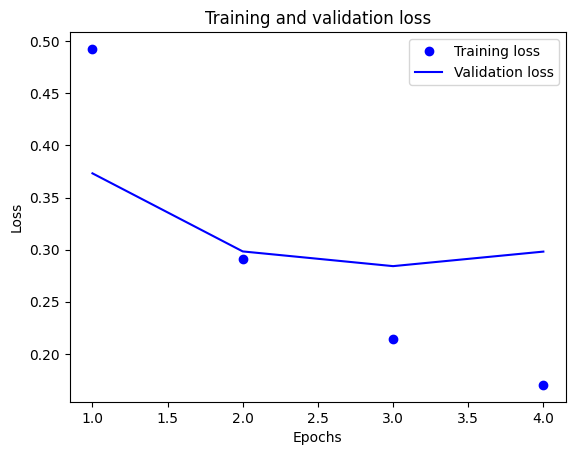

In [5]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
"""Evaluating the Model"""

results = model.evaluate(x_test, y_test)
results

108/782 [===>..........................] - ETA: 0s - loss: 0.3146 - accuracy: 0.8724

2022-08-24 10:24:39.381265: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 1ms/step - loss: 0.3269 - accuracy: 0.8664


[0.3269306421279907, 0.8664000034332275]

## Key Takeaways

TBD - see text book